In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from vitascopic_nca.trainer import Trainer
from vitascopic_nca.config import DefaultTrainerConfig
from tqdm.auto import tqdm
from IPython.display import display, clear_output
import panel as pn

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pn.extension()

In [3]:
#config = DefaultNCAConfig_wMassCons()

config = DefaultTrainerConfig()
print(config)
trainer = Trainer(config)
trainer.sanity_check()

DefaultTrainerConfig(loss_type='clf', padding_type='circular')
0 -16


/home/lapo/git/csenge/vitascopic-nca/src/vitascopic_nca/trainer.py:137: UserWarning: Using a target size (torch.Size([8, 16])) that is different to the input size (torch.Size([8, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(out_msg, msg)


RuntimeError: The size of tensor a (2) must match the size of tensor b (16) at non-singleton dimension 1

In [4]:
#with torch.no_grad():
info = trainer.optim_step(steps=100)
display(trainer.display_optim_step(info))

0 -15


BokehModel(combine_events=True, render_bundle={'docs_json': {'50fc075f-c64b-411e-8c4a-0165394c8dc7': {'version…

In [5]:
pbar = tqdm(range(10_000))
for _ in pbar:
    info = trainer.optim_step(steps=50)
    pbar.set_description(f"Loss: {info['loss']:.4f}")

    if trainer.learning_steps % 250 == 1:
        with torch.no_grad():
            info = trainer.optim_step(steps=50)

        clear_output(wait=True)
        display(pbar.container)
        display(trainer.display_optim_step(info))



Loss: 0.2632: 100%|#########9| 9998/10000 [09:14<00:00, 19.00it/s]

BokehModel(combine_events=True, render_bundle={'docs_json': {'2dc3c0f5-4be7-45ad-b939-aae024cbe757': {'version…

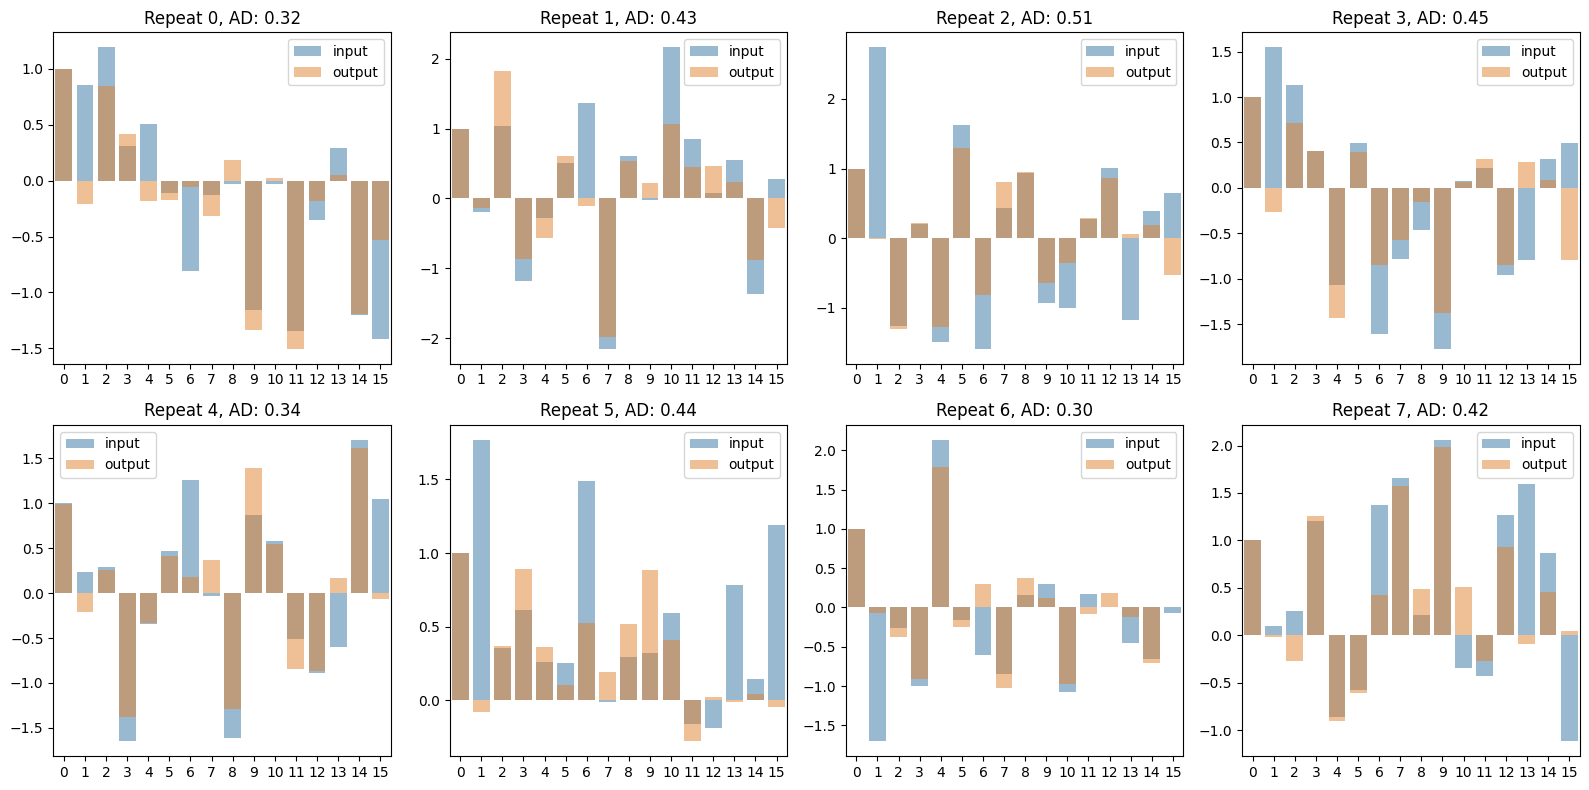

In [6]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()
for i in range(8):
    input_arr = np.array(info["input_msg"][i, :])
    output_arr = np.array(info["output_msg"][i, :])

    sns.barplot(input_arr, ax=axes[i], label='input', fill=True, alpha=0.5)
    sns.barplot(output_arr, ax=axes[i], label='output', fill=True, alpha=0.5)
    
    ave_diff = np.abs(input_arr - output_arr).sum() / output_arr.shape[0]
    axes[i].set_title(f'Repeat {i}, AD: {ave_diff:.2f}')
    axes[i].legend()
    
plt.tight_layout()
plt.show()

In [7]:
diffs=[]
for i in range(8):
    diffs.append(np.abs(info["output_msg"][i, :] - info["input_msg"][i, :]))

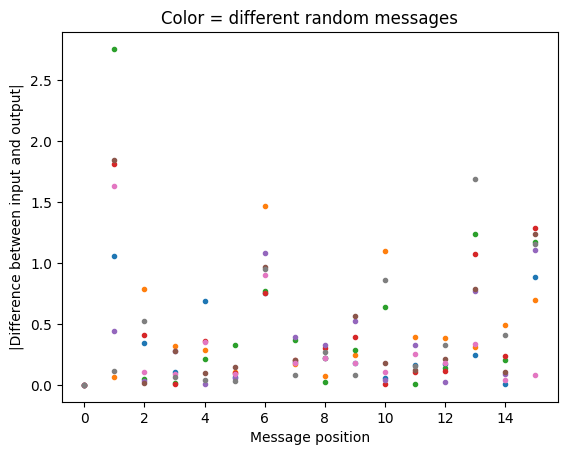

In [8]:
plt.plot(np.array(diffs).T, ".")
plt.xlabel("Message position")
plt.ylabel("|Difference between input and output|")
plt.title("Color = different random messages")
plt.show()

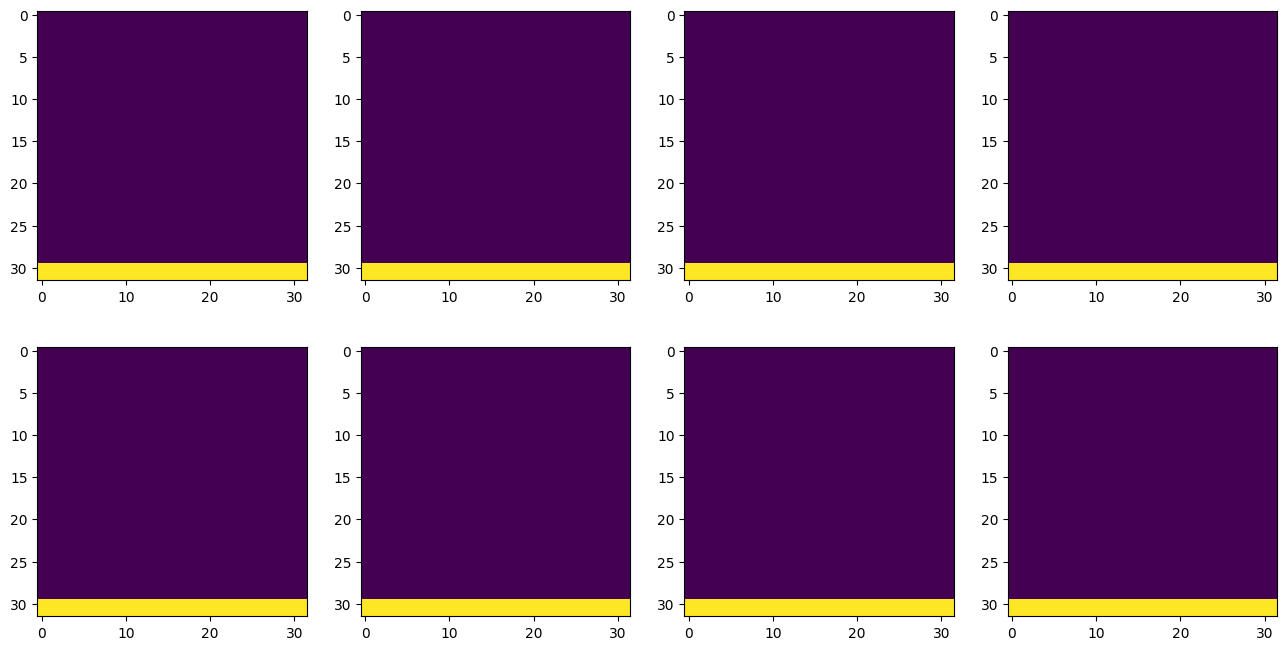

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()
for i in range(8):

    axes[i].imshow(info["final_frame"][i, 0, :, :])

plt.show()

In [10]:
info["final_frame"][i, 0, :, :]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])